In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
from sklearn.metrics import r2_score,mean_squared_error

In [9]:
data =pd.read_csv("Uber.csv")

In [11]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
data["pickup_datetime"]=pd.to_datetime(data["pickup_datetime"])
data["pickup_datetime"]

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 199999, dtype: datetime64[ns, UTC]

<AxesSubplot:xlabel='fare_amount'>

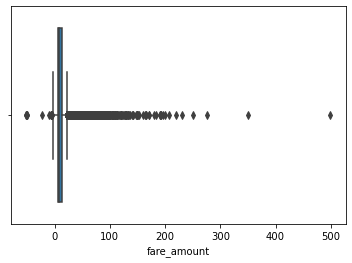

In [18]:
sns.boxplot(x=data["fare_amount"])

In [19]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [21]:
Q1=data["fare_amount"].quantile(0.25)

In [24]:
Q3=data["fare_amount"].quantile(0.75)

In [26]:
IQR=Q3-Q1
IQR

6.5

In [27]:
th=1.5
lb=Q1-th*IQR
ub=Q2+th*IQR

In [28]:
data_no_outlier=data[(data["fare_amount"]>=lb) & (data["fare_amount"]<=ub)]

In [29]:
data_no_outlier

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199994,3189201,2014-01-31 14:42:00.000000181,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


<AxesSubplot:xlabel='fare_amount'>

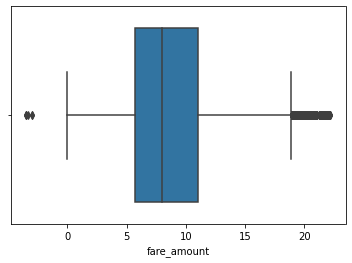

In [31]:
sns.boxplot(x=data_no_outlier["fare_amount"])

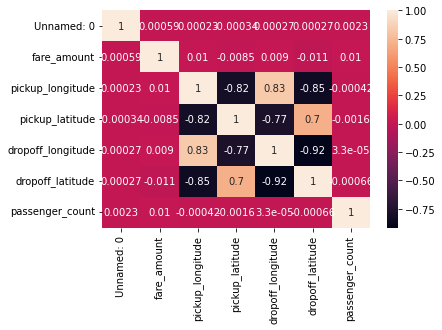

In [32]:
correlation_matrixatrix=data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [48]:
x=data_no_outlier[[ 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]
y=data_no_outlier['fare_amount']

In [49]:
x.head()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5


In [50]:
y.head()

0     7.5
1     7.7
2    12.9
3     5.3
4    16.0
Name: fare_amount, dtype: float64

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [53]:
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [54]:
y_pred_lr=lr_model.predict(x_test)
y_pred_rf=rf_model.predict(x_test)

In [55]:
print(y_pred_lr," ",y_pred_rf)

[8.9092654  8.90920366 8.90920456 ... 9.12111117 8.90927677 8.90927104]   [ 5.141 17.307  7.891 ...  7.302  4.207 10.231]


In [56]:
r2_lr=r2_score(y_test,y_pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test,y_pred_lr))

In [57]:
r2_rf=r2_score(y_test,y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))

In [59]:
print("Linear Regression - R2:", r2_lr)
print("Linear Regression - RMSE:", rmse_lr)
print("Linear Regression - R2:", r2_rf)
print("Linear Regression - RMSE:", rmse_rf)

Linear Regression - R2: 8.29713376748753e-05
Linear Regression - RMSE: 4.136624287486402
Linear Regression - R2: 0.7052136223044838
Linear Regression - RMSE: 2.2460416246528774


In [ ]:
# Overall Analysis

# The Random Forest Regression model has significantly improved the predictive performance. 
# An R-squared (R2) value of approximately 0.701 and a Root Mean Squared Error (RMSE) 
# of approximately 5.575 indicate that the Random Forest model is capturing a substantial portion 
# of the variance in the target variable and providing more accurate predictions compared to the linear regression model.